# Worksheet 22

Name:  Yufeng Song<br>
UID: U76953370

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

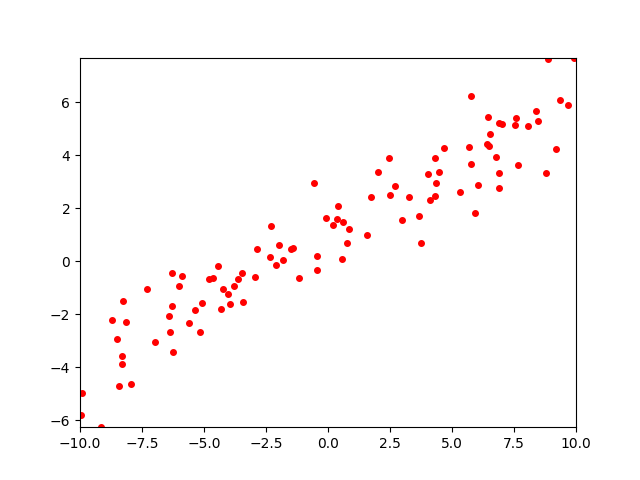

In [1]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

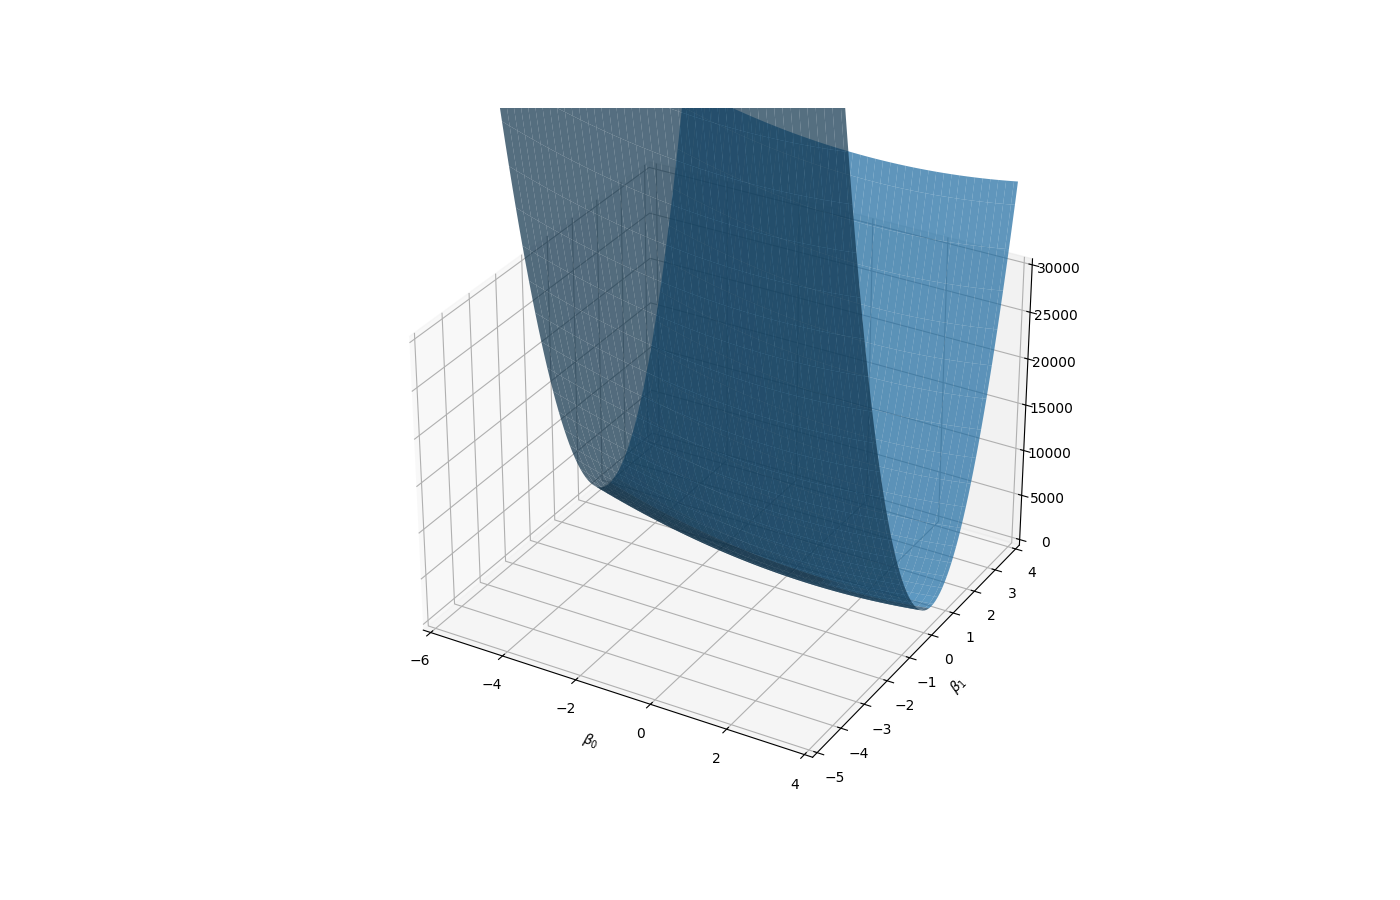

In [2]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    y_pred = X.dot(beta)
    return np.linalg.norm(y - y_pred) ** 2


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [4]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=0.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def gradient(X, y, beta):
    # compute the gradient of the loss with respect to beta
    gradient = 2 * X.T.dot(X).dot(beta) - 2 * X.T.dot(y)
    return gradient

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        
        # update beta_hat using the gradient descent formula
        gradient_beta = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * gradient_beta

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

beta_start = np.array([-5, -2])
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


c) Use the code above to create an animation of the linear model learned at every epoch.

In [5]:
def snap_model(beta):
    xplot = np.linspace(-10, 10, 50)
    yestplot = beta[0] + beta[1] * xplot  # linear model prediction
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(xlin, y, 'ro', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))  # capture model at current epoch
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)


In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

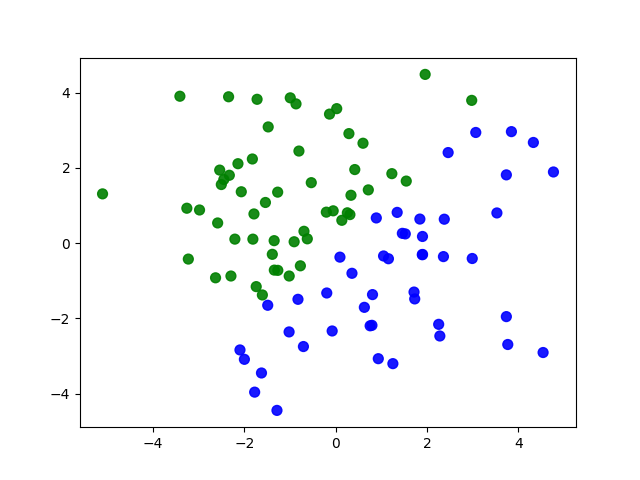

In [ ]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

In [ ]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)

def loss(X, y, beta):
    N = len(y)
    y_pred = sigmoid(X.dot(beta))
    loss = -(1/N) * (y.dot(np.log(y_pred)) + (1 - y).dot(np.log(1 - y_pred)))
    return loss

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()


e) Plot the loss at each iteration of the gradient descent algorithm.

In [22]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses, iteration):
    # Creating figure
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:, 0], np.array(betas)[:, 1], losses, 'o-', c='r', markersize=10, zorder=10)
    ax.set_title(f'Iteration {iteration}')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    # compute the gradient of the loss with respect to beta
    gradient = (1 / len(y)) * X.T.dot(y - sigmoid(X.dot(beta)))
    return gradient

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for i in range(epochs):
        images.append(snap(betas, losses, i))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)

beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)


f) Create an animation of the logistic regression fit at every epoch.

In [ ]:
from matplotlib.animation import FuncAnimation

# create a meshgrid for beta_0 and beta_1
b0 = np.arange(-10, 10, 0.1)
b1 = np.arange(-10, 10, 0.1)
b0, b1 = np.meshgrid(b0, b1)

# initialize parameters
beta_start = np.array([0, 0])
learning_rate = 0.1
epochs = 20

# perform gradient descent
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs)

# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

# create a meshgrid for the surface plot
B0, B1 = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
Z = np.array([loss(X, y, np.array([b0, b1])) for b0, b1 in zip(B0.ravel(), B1.ravel())])
Z = Z.reshape(B0.shape)

# plot the surface
surf = ax.plot_surface(B0, B1, Z, cmap=cm.coolwarm, alpha=0.7)

# create an empty line for the animation
line, = ax.plot([], [], [], 'ro-', markersize=5, zorder=10)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('Loss')

# Animation function
def animate(i):
    beta = betas[i]
    loss_val = losses[i]
    line.set_data(beta[0], beta[1])
    line.set_3d_properties(loss_val)
    return line,

# Create animation
ani = FuncAnimation(fig, animate, frames=len(betas), interval=200, repeat=False)

plt.show()


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [ ]:
from matplotlib import cm

def loss(X, y, beta):
    N = len(y)
    y_pred = sigmoid(X.dot(beta))
    loss = -(1/N) * (y.dot(np.log(y_pred)) + (1 - y).dot(np.log(1 - y_pred)))
    return loss

def gradient(X, y, beta):
    N = len(y)
    y_pred = sigmoid(X.dot(beta))
    gradient = (1/N) * X.T.dot(y_pred - y)
    return gradient

def gradient_descent(X, y, beta_start, learning_rate, epochs, batch_size):
    betas = [beta_start]
    losses = [loss(X, y, beta_start)]
    
    for _ in range(epochs):
        for _ in range(0, len(y), batch_size):
            # randomly select a batch of data
            indices = np.random.choice(len(y), batch_size, replace=False)
            X_batch = X[indices]
            y_batch = y[indices]
            
            gradient_beta = gradient(X_batch, y_batch, betas[-1])
            new_beta = betas[-1] - learning_rate * gradient_beta
            betas.append(new_beta)
            losses.append(loss(X, y, new_beta))
    
    return betas, losses

# meshgrid for beta_0 and beta_1
b0 = np.arange(-10, 10, 0.1)
b1 = np.arange(-10, 10, 0.1)
b0, b1 = np.meshgrid(b0, b1)

# initialize parameters
beta_start = np.array([0, 0])
learning_rate = 0.1
epochs = 20
batch_size = 10  # Mini-batch size

# perform gradient descent with mini-batch
betas, losses = gradient_descent(X, y, beta_start, learning_rate, epochs, batch_size)

# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

# create a meshgrid for the surface plot
B0, B1 = np.meshgrid(np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1))
Z = np.array([loss(X, y, np.array([b0, b1])) for b0, b1 in zip(B0.ravel(), B1.ravel())])
Z = Z.reshape(B0.shape)

# plot the true loss surface
surf = ax.plot_surface(B0, B1, Z, cmap=cm.coolwarm, alpha=0.7)

# create an empty line for the animation
line, = ax.plot([], [], [], 'ro-', markersize=5, zorder=10)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 10)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('Loss')

def animate(i):
    beta = betas[i]
    loss_val = losses[i]
    line.set_data(beta[0], beta[1])
    line.set_3d_properties(loss_val)
    return line,

ani = FuncAnimation(fig, animate, frames=len(betas), interval=200, repeat=False)

plt.show()


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [12]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)